In [3]:
#https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/

In [1]:
# multivariate multi-step stacked lstm example
from numpy import array
from numpy import hstack
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import TimeDistributed
from tensorflow.python.keras.layers.convolutional import Conv1D
from tensorflow.python.keras.layers.convolutional import MaxPooling1D
 

# split a multivariate sequence into samples
def split_sequences(sequences, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out-1
		# check if we are beyond the dataset
		if out_end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1:out_end_ix, -1]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

C:\Users\DEJOKUR\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\DEJOKUR\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\.libs\libopenblas.IPBC74C7KURV7CB2PKT5Z5FNR3SIBV4J.gfortran-win_amd64.dll
C:\Users\DEJOKUR\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\DEJOKUR\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
import pandas as pd
df = pd.read_csv('../datasets/industrial_sensor_data.csv')

In [3]:
cols = list(df.columns)

In [4]:
cols.remove('20-LT-1034_HSI_X_Value')

In [5]:
import numpy as np
col_arr = [df[col].values for col in cols] + [df['20-LT-1034_HSI_X_Value'].values]
dataset = np.stack(col_arr, axis=1)
    

In [153]:

# choose a number of time steps
n_steps_in, n_steps_out = 20, 50
# covert into input/output
X, y = split_sequences(dataset, n_steps_in, n_steps_out)
# the dataset knows the number of features, e.g. 2
n_features = X.shape[2]




In [154]:
dataset.shape

(34621, 13)

In [155]:
X.shape, y.shape

((34553, 20, 12), (34553, 50))

In [156]:
X.shape

(34553, 20, 12)

In [157]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
model.add(LSTM(100, activation='relu'))
model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=10, verbose=1)

Epoch 1/10
1080/1080 [==============================] - 70s 65ms/step - loss: 5.4741
Epoch 2/10
1080/1080 [==============================] - 75s 69ms/step - loss: 0.0182
Epoch 3/10
1080/1080 [==============================] - 69s 64ms/step - loss: 0.0089
Epoch 4/10
1080/1080 [==============================] - 75s 70ms/step - loss: 0.0071
Epoch 5/10
1080/1080 [==============================] - 70s 65ms/step - loss: 0.0065
Epoch 6/10
1080/1080 [==============================] - 76s 70ms/step - loss: 0.0061
Epoch 7/10
1080/1080 [==============================] - 71s 66ms/step - loss: 0.0059
Epoch 8/10
1080/1080 [==============================] - 76s 70ms/step - loss: 0.0056
Epoch 9/10
1080/1080 [==============================] - 69s 64ms/step - loss: 0.0055
Epoch 10/10
1080/1080 [==============================] - 75s 69ms/step - loss: 0.0054


In [173]:
# demonstrate prediction
x_input = array([[70, 75], [80, 85], [90, 95]])
x_input = X[-10000]
x_input = x_input.reshape((1, n_steps_in, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[0.8217792  0.8090472  0.81997883 0.8069387  0.8433524  0.8224306
  0.7941735  0.8268618  0.81952834 0.83914775 0.82873094 0.8266416
  0.8227647  0.8350574  0.82411313 0.8208721  0.81130326 0.81990945
  0.8267696  0.8129911  0.83598465 0.8275276  0.83685327 0.83518237
  0.80297935 0.80656517 0.8167193  0.80622655 0.832039   0.81954783
  0.8245892  0.8154718  0.84369767 0.82308125 0.8116429  0.825825
  0.8296555  0.8313518  0.83546424 0.8208107  0.84453607 0.83713263
  0.80985886 0.81562746 0.8197674  0.8073324  0.79740185 0.8402171
  0.8200496  0.85599786]]


In [159]:
y[-1]

array([0.9000112 , 0.90001124, 0.9000112 , 0.9000112 , 0.9000112 ,
       0.9000112 , 0.9000112 , 0.9000112 , 0.9000112 , 0.9000112 ,
       0.9000112 , 0.90001124, 0.9000112 , 0.9000112 , 0.9000112 ,
       0.9000112 , 0.9000112 , 0.9000112 , 0.9000112 , 0.9000112 ,
       0.9000112 , 0.90001124, 0.9000112 , 0.9000112 , 0.9000112 ,
       0.9000112 , 0.9000112 , 0.9000112 , 0.9000112 , 0.9000112 ,
       0.9000112 , 0.9000112 , 0.90001122, 0.90001122, 0.90001122,
       0.90001122, 0.90001122, 0.90001122, 0.90001122, 0.90001122,
       0.90001122, 0.90001122, 0.90001122, 0.90001122, 0.90001122,
       0.90001122, 0.90001122, 0.90001122, 0.90001122, 0.90001122])

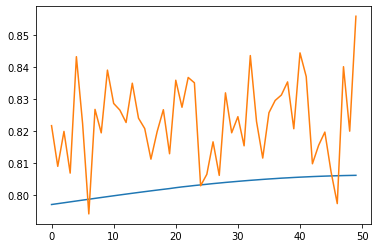

In [174]:
import matplotlib.pyplot as plt
plt.plot(y[-10000])
plt.plot(yhat[0])
plt.show()

In [163]:
df['20-LT-1034_HSI_X_Value'].values

array([0.79987365, 0.79987365, 0.79987365, ..., 0.90001122, 0.90001122,
       0.90001122])

In [128]:
len(df)

34621

In [130]:
len(y)

34618

In [172]:
y[-10000]

array([0.7971136 , 0.79738838, 0.79766375, 0.79793972, 0.7982152 ,
       0.79849005, 0.79876405, 0.7990371 , 0.79930852, 0.79957795,
       0.799845  , 0.80010957, 0.80037133, 0.80062995, 0.80088532,
       0.8011372 , 0.80138488, 0.80162837, 0.80186745, 0.8021021 ,
       0.8023772 , 0.80262325, 0.80283003, 0.80305284, 0.80324878,
       0.80344972, 0.80365397, 0.8038328 , 0.80402383, 0.80419037,
       0.80435973, 0.80452207, 0.80467762, 0.80481928, 0.80496868,
       0.80510337, 0.80522505, 0.80535803, 0.80546005, 0.80557215,
       0.80567138, 0.80575883, 0.80584842, 0.80592593, 0.8059932 ,
       0.80605995, 0.8061137 , 0.80616584, 0.8062061 , 0.80624188])

In [164]:
X[-2]

array([[50.        ,  1.5       ,  1.50003016,  1.50003016, 59.1532059 ,
         0.9       ,  0.90001122, 56.6524582 , 18.        , 18.000082  ,
        18.000082  , 48.61665   ],
       [50.        ,  1.5       ,  1.50003016,  1.50003016, 59.1532059 ,
         0.9       ,  0.90001124, 56.652462  , 18.        , 18.000082  ,
        18.000082  , 48.61665   ],
       [50.        ,  1.5       ,  1.50003016,  1.50003016, 59.1532059 ,
         0.9       ,  0.9000112 , 56.6524544 , 18.        , 18.000082  ,
        18.000082  , 48.61665   ],
       [50.        ,  1.5       ,  1.50003016,  1.50003016, 59.1532059 ,
         0.9       ,  0.9000112 , 56.6524544 , 18.        , 18.000082  ,
        18.000082  , 48.61665   ],
       [50.        ,  1.5       ,  1.50003016,  1.50003016, 59.1532059 ,
         0.9       ,  0.9000112 , 56.6524544 , 18.        , 18.000082  ,
        18.000082  , 48.61665   ],
       [50.        ,  1.5       ,  1.50003016,  1.50003016, 59.1532059 ,
         0.9       ,  

In [184]:
# univariate stacked lstm example
from numpy import array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
 
# split a univariate sequence
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [185]:
# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]

import pandas as pd
df = pd.read_csv('../datasets/weather_energy_hourly.csv')
raw_seq = list(df.avg_energy.values)

In [187]:
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=10, verbose=1)

Epoch 1/10
621/621 [==============================] - 8s 13ms/step - loss: 0.0164
Epoch 2/10
621/621 [==============================] - 9s 14ms/step - loss: 0.0027
Epoch 3/10
621/621 [==============================] - 9s 14ms/step - loss: 0.0022
Epoch 4/10
621/621 [==============================] - 9s 15ms/step - loss: 0.0018
Epoch 5/10
621/621 [==============================] - 9s 15ms/step - loss: 0.0014: 0s - l
Epoch 6/10
621/621 [==============================] - 9s 14ms/step - loss: 0.0014
Epoch 7/10
621/621 [==============================] - 8s 14ms/step - loss: 0.0013
Epoch 8/10
621/621 [==============================] - 8s 12ms/step - loss: 0.0013
Epoch 9/10
621/621 [==============================] - 8s 12ms/step - loss: 0.0013
Epoch 10/10
621/621 [==============================] - 8s 13ms/step - loss: 0.0013: 0s - loss: 0


In [186]:


# demonstrate prediction
x_input = array([70, 80, 90])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

KeyboardInterrupt: 

In [22]:
X.shape

(3563, 39, 1)

In [18]:
# univariate multi-step vector-output stacked lstm example
from numpy import array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
import numpy as np

# split a univariate sequence into samples
def split_sequence(sequence, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out
		# check if we are beyond the sequence
		if out_end_ix > len(sequence):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]

import pandas as pd
df = pd.read_csv('../datasets/daily-min-temperatures-australia.csv')
raw_seq = list(df.Temp.values)
raw_seq = (raw_seq - np.min(raw_seq)) / np.ptp(raw_seq)

# choose a number of time steps
n_steps_in, n_steps_out = 39, 49
# split into samples
X, y = split_sequence(raw_seq, n_steps_in, n_steps_out)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

# define model
model = Sequential()
model.add(LSTM(150, activation='relu', input_shape=(n_steps_in, n_features)))
model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mse')

# # define model
# model = Sequential()
# model.add(LSTM(100, activation='relu', input_shape=(n_steps_in, n_features)))
# model.add(RepeatVector(n_steps_out))
# model.add(LSTM(100, activation='relu', return_sequences=True))
# model.add(TimeDistributed(Dense(1)))
# model.compile(optimizer='adam', loss='mse')



# model = Sequential()
# model.add(LSTM(100, activation='relu', input_shape=(n_steps_in, n_features)))
# model.add(Conv1D(filters=128, kernel_size=5, padding='causal', activation='relu', input_shape=[None, 1]))
# model.add(LSTM(100, activation='relu', return_sequences=True))
# model.add(TimeDistributed(Dense(1)))
# model.compile(optimizer='adam', loss='mse')




# fit model
model.fit(X, y, epochs=30, verbose=1)


Epoch 1/30
112/112 [==============================] - 7s 61ms/step - loss: 0.0357
Epoch 2/30
112/112 [==============================] - 7s 59ms/step - loss: 0.0165
Epoch 3/30
112/112 [==============================] - 7s 60ms/step - loss: 0.0161
Epoch 4/30
112/112 [==============================] - 7s 60ms/step - loss: 0.0157
Epoch 5/30
112/112 [==============================] - 7s 61ms/step - loss: 0.0153
Epoch 6/30
112/112 [==============================] - 7s 66ms/step - loss: 0.0152
Epoch 7/30
112/112 [==============================] - 8s 69ms/step - loss: 0.0153
Epoch 8/30
112/112 [==============================] - 8s 70ms/step - loss: 0.0152
Epoch 9/30
112/112 [==============================] - 8s 74ms/step - loss: 0.0150
Epoch 10/30
112/112 [==============================] - 9s 78ms/step - loss: 0.0151
Epoch 11/30
112/112 [==============================] - 9s 82ms/step - loss: 0.0148
Epoch 12/30
112/112 [==============================] - 11s 96ms/step - loss: 0.0148
Epoch 13/30


In [19]:
# demonstrate prediction
x_input = X[-1]
x_input = x_input.reshape((1, n_steps_in, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[0.47247615 0.49022728 0.48756063 0.4936578  0.495443   0.49075475
  0.5023929  0.5061917  0.5079786  0.5091879  0.5081545  0.53247786
  0.5245226  0.514188   0.52222294 0.5078613  0.52030027 0.5367274
  0.5252641  0.53438634 0.53408146 0.5440008  0.5403536  0.546939
  0.54502857 0.54055804 0.557359   0.54277337 0.544529   0.53005713
  0.52289844 0.5230029  0.53688586 0.53738713 0.53128326 0.5454878
  0.54993975 0.54944384 0.56047463 0.55838895 0.5562284  0.5433229
  0.5525124  0.553616   0.5630253  0.56659395 0.5628538  0.5639725
  0.5620323 ]]


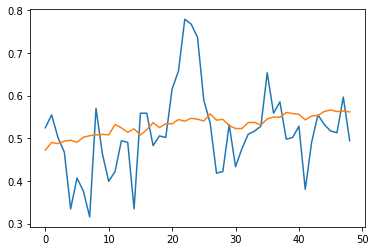

In [20]:
import matplotlib.pyplot as plt
plt.plot(raw_seq[-49:])
plt.plot(yhat[0])
plt.show()

In [21]:
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


def calculate_loss(yhat, test_y):
    rmse = mean_squared_error(yhat, test_y) ** 0.5
    r2 = r2_score(test_y, yhat, multioutput = "variance_weighted")
    return rmse, r2

calculate_loss(yhat[0], raw_seq[-49:])

(0.09461358877863686, 0.07709914496810812)